# 0.run

In [29]:
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from numpy import random

In [30]:
# 24, 12, 6
# 预测6步长 
setting = "informer_data011_ftMS_sl24_ll12_pl6_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0"
pred = np.load('./informer/results/' + setting + '/pred.npy')
true = np.load('./informer/results/' + setting + '/true.npy')
print(pred.shape)
print(true.shape)

(11712, 6, 1)
(11712, 6, 1)


In [31]:
pred

array([[[436.28864],
        [436.97498],
        [437.10092],
        [437.13702],
        [437.21637],
        [437.1191 ]],

       [[436.72717],
        [437.4231 ],
        [437.5258 ],
        [437.6442 ],
        [437.77188],
        [437.6211 ]],

       [[436.9118 ],
        [437.51874],
        [437.52548],
        [437.6119 ],
        [437.773  ],
        [437.58704]],

       ...,

       [[432.08087],
        [432.62378],
        [432.5389 ],
        [432.79022],
        [432.8233 ],
        [433.1256 ]],

       [[432.57794],
        [432.90045],
        [432.90878],
        [433.0455 ],
        [433.01306],
        [433.39963]],

       [[432.79633],
        [433.30887],
        [433.24765],
        [433.43124],
        [433.31363],
        [433.75003]]], dtype=float32)

In [32]:
# 未来第1步的预测 
df = pd.DataFrame(np.column_stack((pred[:, 0].reshape(-1, 1), 
                                    true[:, 0].reshape(-1, 1))), 
                   columns = ["pred", "true"])

In [33]:
high = 433
low  = 420
print(f"high: {high} \nlow : {low}")

high: 433 
low : 420


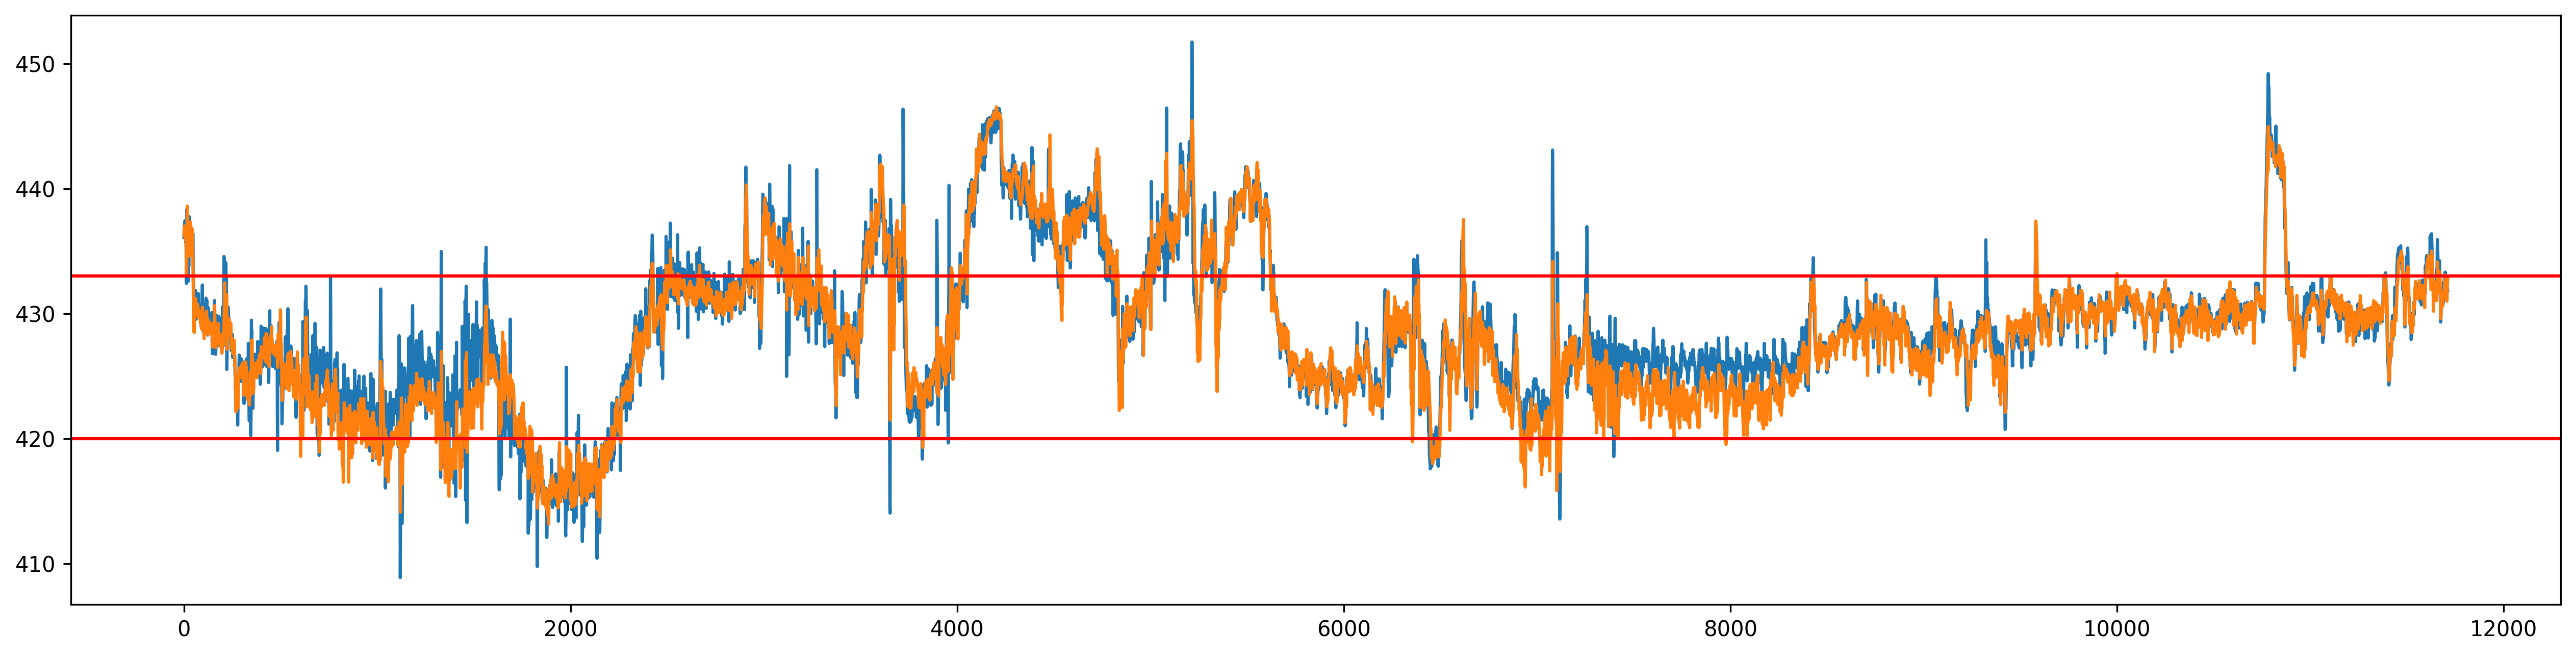

In [34]:
# 未来第1步的预测 
figure(figsize=(21, 5), dpi=300)
plt.plot(df["true"])
plt.plot(df["pred"])
plt.axhline(y = high, color = 'r', linestyle = '-')
plt.axhline(y = low,  color = 'r', linestyle = '-')
plt.show()

In [102]:
# classify true values
df["anomaly"] = 0
df.loc[(df['true'] >= high) | (df['true'] <= low), "anomaly"] = 1
# classiify predictions
df["anomaly_pred"] = 0
df.loc[(df['pred'] >= high) | (df['pred'] <= low), "anomaly_pred"] = 1

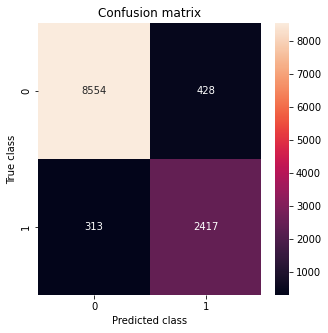

In [104]:
conf_matrix = confusion_matrix(df["anomaly"], df["anomaly_pred"])

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=[0, 1], yticklabels=[0, 1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.show()

In [106]:
print(f"true 0 rate: {(conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])).round(5)}\ntrue 1 rate: {(conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1])).round(5)}")

true 0 rate: 0.95235
true 1 rate: 0.88535


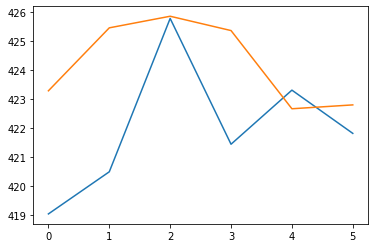

In [149]:
# 第未来某个时间的未来24个时间的预测 
index = random.randint(10000)
df1= pd.DataFrame(np.hstack((pred[index, :].reshape(-1, 1), 
                                true[index, :].reshape(-1, 1))), 
                      columns = ["pred", "true"])
# plt.ylim(410, 435)
plt.plot(df1["pred"])
plt.plot(df1["true"])
plt.show()

# 24步长时间间隔1h

In [52]:
# the prediction will be saved in ./results/{setting}/real_prediction.npy
# 96, 48, 24
# 预测24步长 
setting = "informer_data011_ftMS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0"
pred = np.load('./informer/results/' + setting + '/pred.npy')
true = np.load('./informer/results/' + setting + '/true.npy')
print(pred.shape)
print(true.shape)

(11712, 24, 1)
(11712, 24, 1)


In [54]:
# 未来第1步的预测 
df0 = pd.DataFrame(np.column_stack((pred[:, 0].reshape(-1, 1), 
                                    true[:, 0].reshape(-1, 1))), 
                   columns = ["pred_0", "true_0"])

In [89]:
high = 433
low  = 420
print(f"high: {high} \nlow : {low}")

high: 433 
low : 420


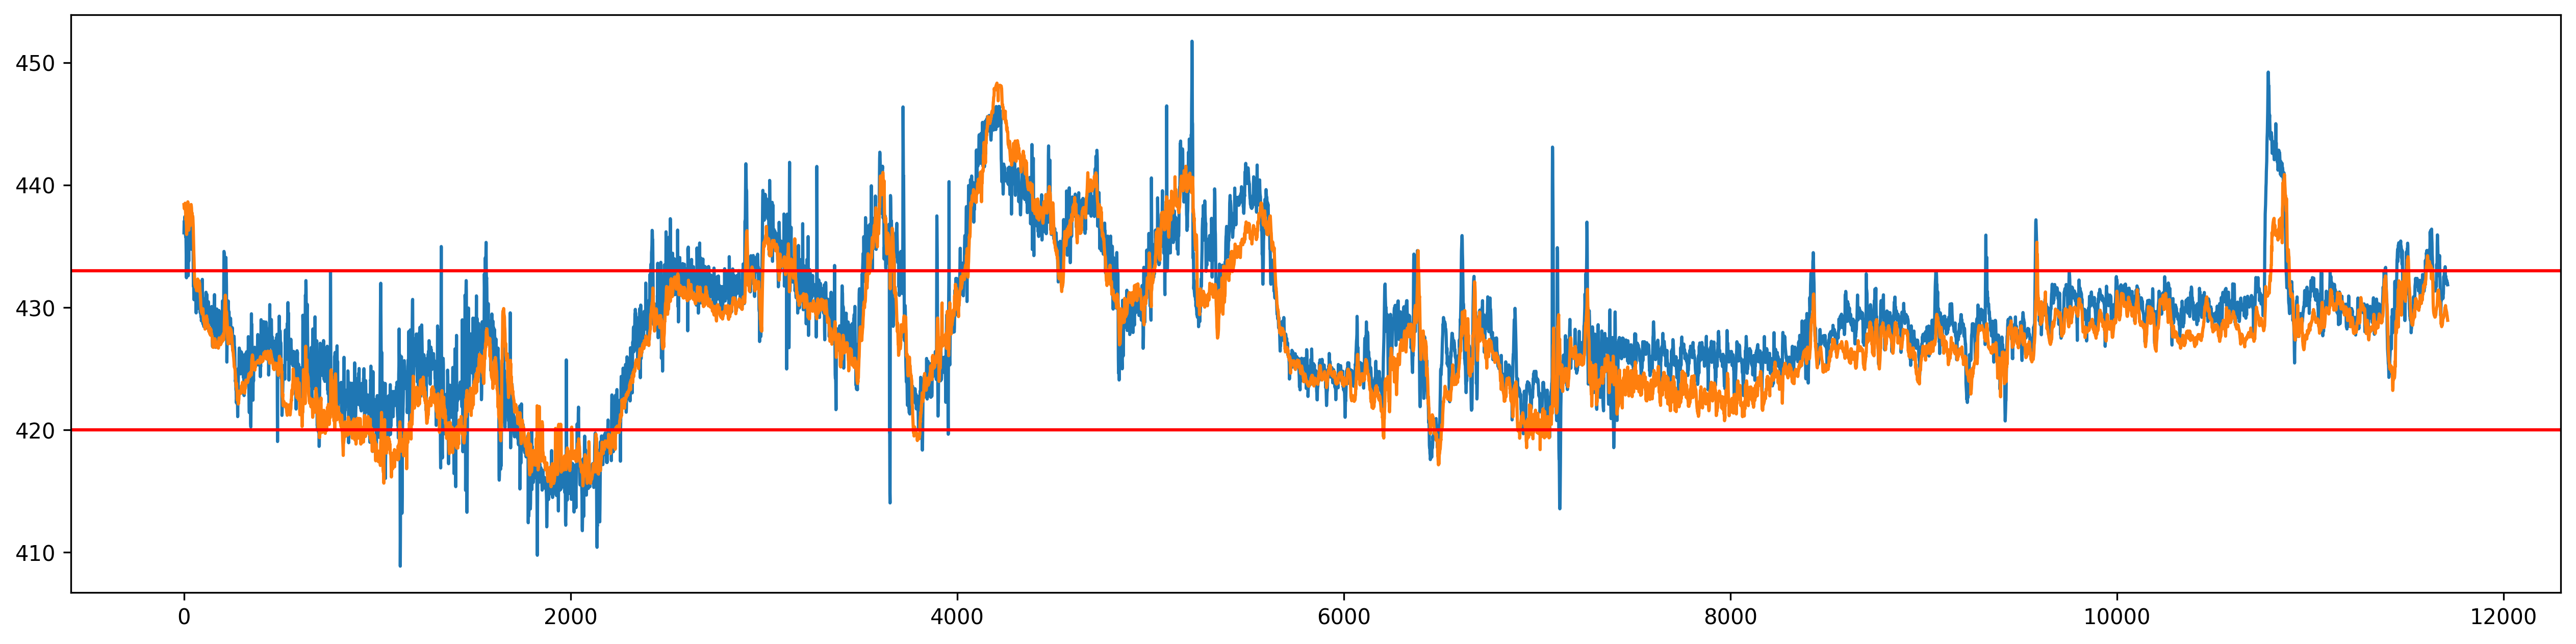

In [90]:
# 未来第1步的预测 
figure(figsize=(21, 5), dpi=300)
plt.plot(df0["true_0"])
plt.plot(df0["pred_0"])
plt.axhline(y = high, color = 'r', linestyle = '-')
plt.axhline(y = low,  color = 'r', linestyle = '-')
plt.show()

In [91]:
# classify true values
df0["anomaly"] = 0
df0.loc[(df0['true_0'] >= high) | (df0['true_0'] <= low), "anomaly"] = 1
# classiify predictions
df0["anomaly_pred"] = 0
df0.loc[(df0['pred_0'] >= high) | (df0['pred_0'] <= low), "anomaly_pred"] = 1

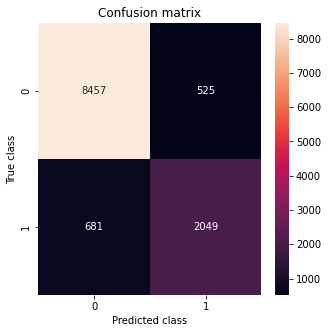

In [92]:
conf_matrix = confusion_matrix(df0["anomaly"], df0["anomaly_pred"])

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=[0, 1], yticklabels=[0, 1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.show()

In [93]:
print(f"true 0 rate: {(conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])).round(5)}\ntrue 1 rate: {(conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1])).round(5)}")

true 0 rate: 0.94155
true 1 rate: 0.75055


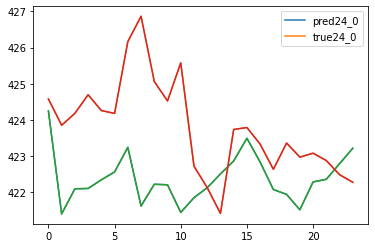

In [94]:
# 第未来某个时间的未0预测 
index = x = random.randint(1000)
df24_1= pd.DataFrame(np.hstack((pred[index, :].reshape(-1, 1), 
                                true[index, :].reshape(-1, 1))), 
                      columns = ["pred24_0", "true24_0"])
df24_1.plot()
plt.plot(df24_1["pred24_0"])
plt.plot(df24_1["true24_0"])